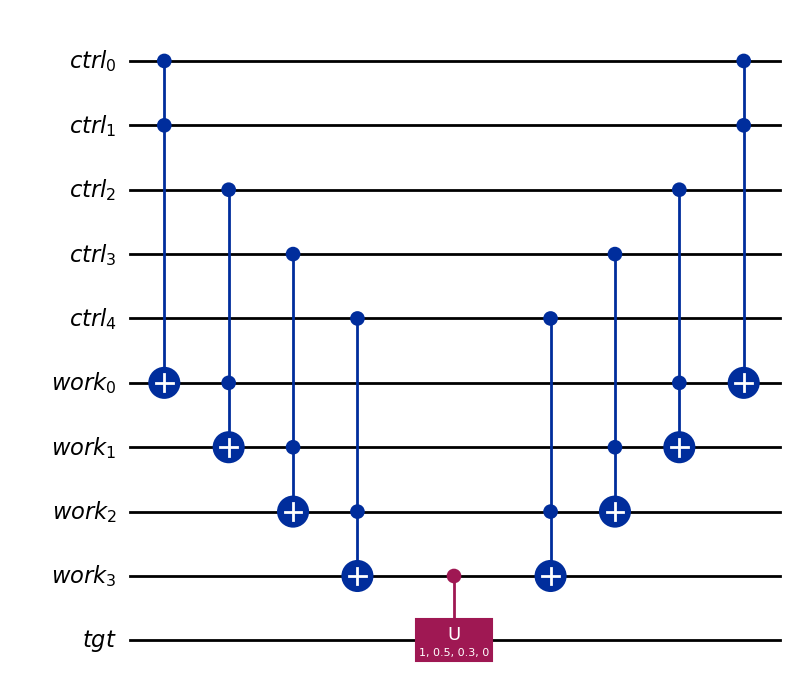

In [23]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import UGate

# Define parameters
theta = 1.0
phi = 0.5
lam = 0.3

# Create the base U gate
u = UGate(theta, phi, lam)

# Create controlled-U gate
cu = u.control(1)  # 1 control qubit

control_reg = QuantumRegister(5, 'ctrl')   # control qubits
working_reg = QuantumRegister(4, 'work')   # working qubit
target_reg = QuantumRegister(1, 'tgt')     # target qubit (if needed)
qc = QuantumCircuit(control_reg, working_reg, target_reg)
qc.ccx(control_reg[0], control_reg[1], working_reg[0])
qc.ccx(control_reg[2], working_reg[0], working_reg[1])
qc.ccx(control_reg[3], working_reg[1], working_reg[2])
qc.ccx(control_reg[4], working_reg[2], working_reg[3])

# Apply controlled-U with control on qubit 3, target on qubit 0
qc.append(cu, [working_reg[3], target_reg[0]])
# qc.cx(working_reg[3], target_reg[0])

qc.ccx(control_reg[4], working_reg[2], working_reg[3])
qc.ccx(control_reg[3], working_reg[1], working_reg[2])
qc.ccx(control_reg[2], working_reg[0], working_reg[1])
qc.ccx(control_reg[0], control_reg[1], working_reg[0])

qc.draw(output='mpl')

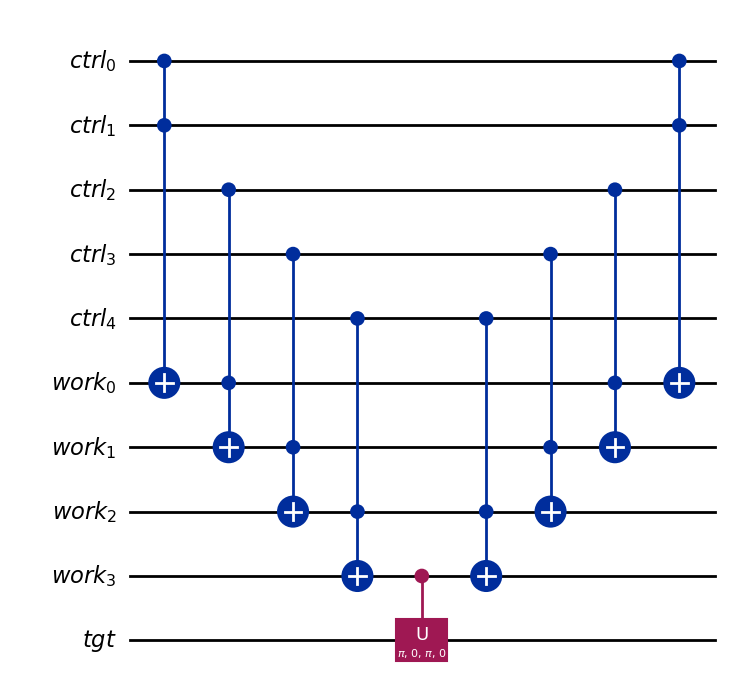

In [30]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import UGate

# Define parameters
theta = np.pi
phi = 0
lam = np.pi

# Create the base U gate
u = UGate(theta, phi, lam)

# Create controlled-U gate
cu = u.control(1)  # 1 control qubit

def get_qc_for_n_qubit_GHZ_state(n):
    control_reg = QuantumRegister(n, 'ctrl')   # control qubits
    working_reg = QuantumRegister(n-1, 'work')   # working qubit
    target_reg = QuantumRegister(1, 'tgt')     # target qubit
    qc = QuantumCircuit(control_reg, working_reg, target_reg)

    qc.ccx(control_reg[0], control_reg[1], working_reg[0])

    for i in range(2, n):
        qc.ccx(control_reg[i], working_reg[i-2], working_reg[i-1])
    
    qc.append(cu, [working_reg[n-2], target_reg[0]])

    for i in range(n-1, 1, -1):
        qc.ccx(control_reg[i], working_reg[i-2], working_reg[i-1])
    
    qc.ccx(control_reg[0], control_reg[1], working_reg[0])

    return qc 

n = 5
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

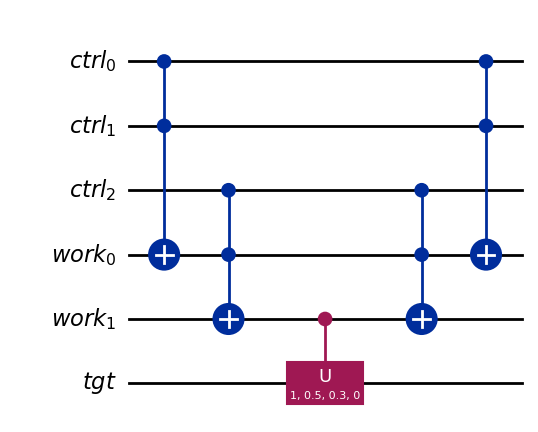

In [26]:
n = 3
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

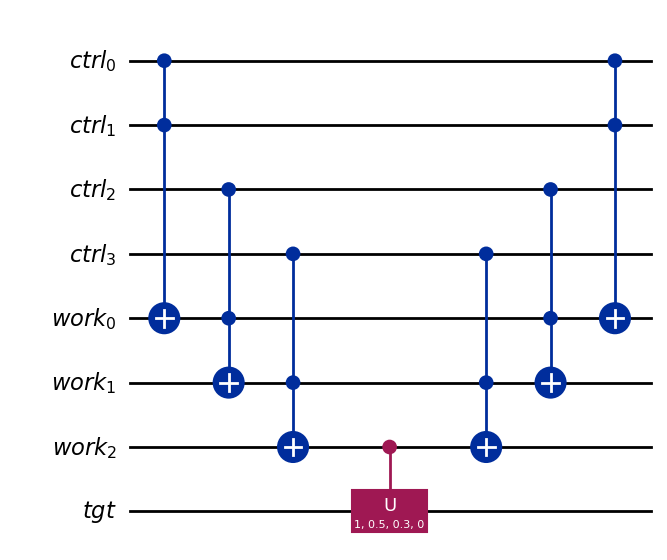

In [27]:
n = 4
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

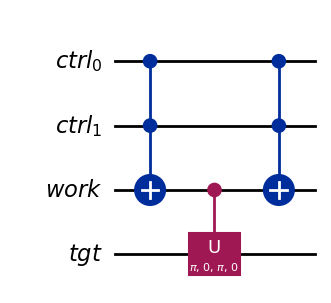

In [31]:
n = 2
theta = np.pi
phi = 0
lam = np.pi
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')